# About Dataset
Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

In [4]:
data_library= {'Pregnancies': 'Number of times pregnant', 'Glucose': 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test','BloodPressure':'Diastolic blood pressure (mm Hg)', 'SkinThickness': 'Triceps skin fold thickness (mm)', 'Insulin': '2-Hour serum insulin (mu U/ml)','BMI': 'Body mass index (weight in kg/(height in m)^2)','DiabetesPedigreeFunction': 'Diabetes pedigree function','Age': 'Age (years)', 'Outcome': 'Class variable (0 or 1)'}

In [6]:
data_library['Pregnancies']

'Number of times pregnant'

# importing libraries

In [8]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import shapiro , pearsonr
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
import missingno as msn

In [23]:
def miss_val(x):
    miss_val =[]
    for i in x.columns:
        for j in x[i]:
            if x[x[i].isna()].shape[0]>=1:
                miss_val.extend(x[x[i].isna()].index)
    return miss_val

            
            
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    pos=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
            pos.append(i)
    return out,pos

def feature_box_kde_normality(x):
    normality_test(df[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.kdeplot(data=df,x=x,ax=ax2)
    
def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")
        
def missing_values(df):
    for i in df.columns:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
def feature_analysis(x):
    a = df[x].unique()
    d = df[x].value_counts()
    b = df[x].value_counts(normalize = True)
    c = df[x].isna().sum()
    print('unique_values:', a,'value_counts:',d,'proportion of value:', b,'count of nan values:', c)
    
def count_plot(x):
    fig, (axis)  = plt.subplots(1, 1,figsize=(10,7))
    sns.countplot(x=df[x], data=df, ax=axis)
    plt.title('Count Plot for Categorical Variable ',x, fontsize = 15)

def high_frequency(x):
    sns.countplot(df[x])
    print('the variable with more frequency is', df[x].mode()[0])
    
def comparison_plot(x,y):
    fig,(axis1) = plt.subplots(1,1,figsize=(15,10))
    sns.countplot(x=df[x], hue= y ,data=df, ax = axis1)
    plt.show()
    
def multi_comparison (x,y,z):
    fig, (axis1)  = plt.subplots(1, 1,figsize=(20,5))
    sns.barplot(x=df[x], y= df[y], hue=df[z], data=df, ax=axis1)
    

def cat_dtype_change(x):
    df[x]= df[x].astype('object')
    df[x].info()
    
def model_build(x_train, y_train):
    Logit_Model = LogisticRegression()
    Logit_Model.fit(x_train,y_train)
    decision_tree = DecisionTreeClassifier(criterion = 'entropy')
    decision_tree.fit(x_train,y_train)
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(x_train, y_train)
    models = {'logis': Logit_Model, 'decision tree': decision_tree, 'random_forest': random_forest}
    return models

def train_test(x,y):
    x_encoded = pd.get_dummies(x, drop_first=True)
    scaler = StandardScaler()
    scaler.fit(x_encoded)
    x1 = scaler.fit_transform(x_encoded)
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=45)
    

def count_pie(x):
    plt.figure(figsize = (15,5))
    explode = [0.15,0]
    plt.subplot(121)
    df[x].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
    plt.subplot(122)
    sns.countplot(data = df, x = df[x])
    print('the variable with more frequency is', df[x].mode()[0])
        

# IMPORT DATA

In [10]:
df = pd.read_csv('diabetes.csv')

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
# it gives the information about the data and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# It gives shape of the dataset
df.shape

(768, 9)

In [14]:
df.columns= list(map(lambda x:x.lower().replace(' ','_'),df.columns))

In [15]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

# MISSING VALUES

In [16]:
# we have to check whether there is a missing values in the dataset if there is missing values impute them with mode 
 #mode is for both categorical and numerical data 

In [17]:
# We use this "isna function" to find missing values inthe data otherwise called as nan values
df.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [18]:
# to find the proportion of the missing values we use this function
df.isna().sum()/df.shape[0]*100

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

<AxesSubplot:>

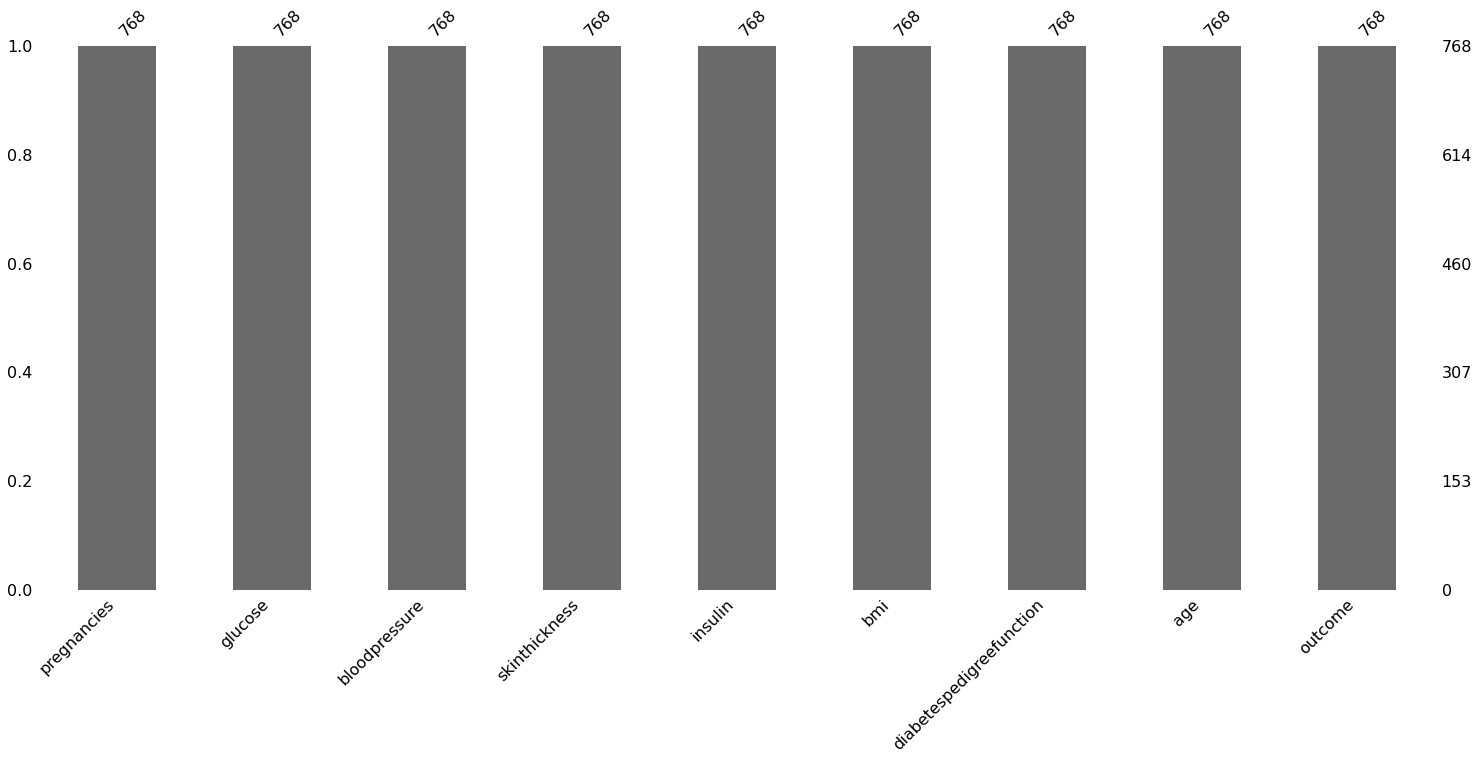

In [19]:
# Checking NaN values we can use this plot
msn.bar(df)

In [20]:
cm = sns.color_palette("blend:pink,black", as_cmap=True)
df.describe().style.background_gradient(cmap = cm,axis = None)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# PREGNANCIES

In [22]:
df['pregnancies'].value_counts().count()

17

In [15]:
feature_analysis('pregnancies')

unique_values: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14] value_counts: 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnancies, dtype: int64 proportion of value: 1     0.175781
0     0.144531
2     0.134115
3     0.097656
4     0.088542
5     0.074219
6     0.065104
7     0.058594
8     0.049479
9     0.036458
10    0.031250
11    0.014323
13    0.013021
12    0.011719
14    0.002604
15    0.001302
17    0.001302
Name: pregnancies, dtype: float64 count of nan values: 0


The statistic value is 0.9042782783508301 with p-value : 1.6080885881590613e-21
pregnancies is not normally distributed
Outlier : ([15, 17, 14, 14], [88, 159, 298, 455])


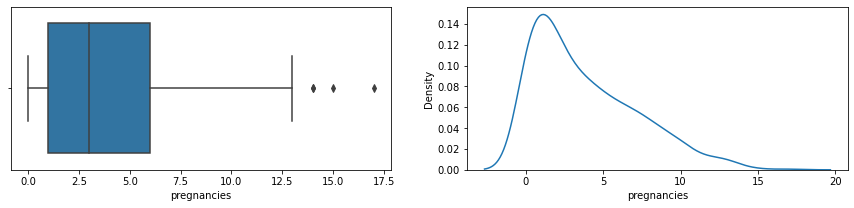

In [24]:
feature_box_kde_normality('pregnancies')

In [ ]:
RIGHT SKEWD OR POSITIVELY SKEWED .

In [25]:
df['pregnancies'].mean()

3.8450520833333335

In [26]:
df['pregnancies']= df['pregnancies'].replace({15:4,17:4, 14:4})

<AxesSubplot:xlabel='pregnancies'>

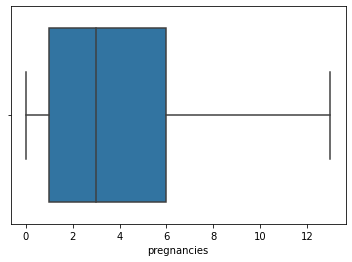

In [27]:
sns.boxplot(data = df, x= df['pregnancies'])

In [28]:
df['pregnancies'].value_counts().count()

14

the variable with more frequency is 1


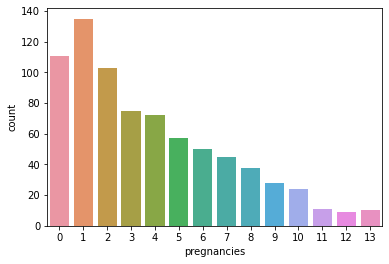

In [32]:
high_frequency('pregnancies')

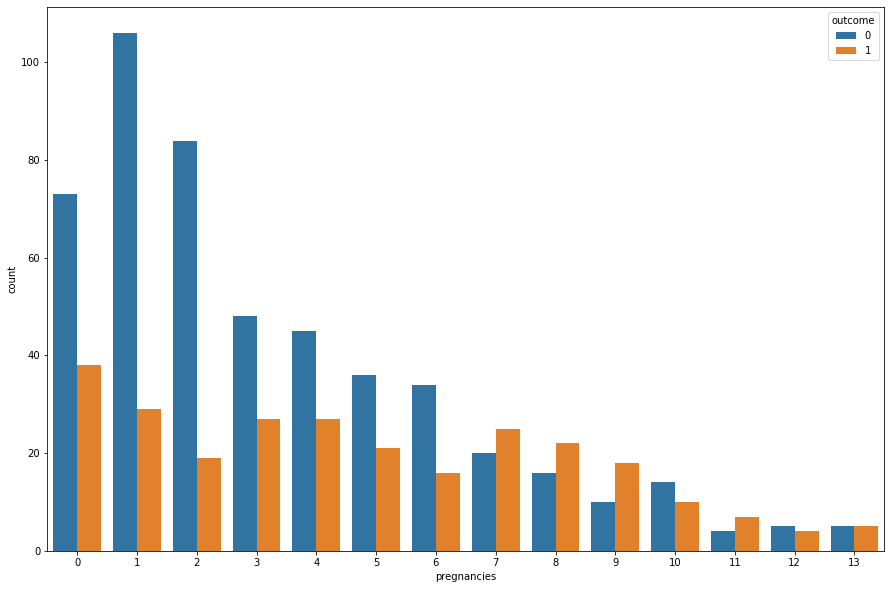

In [33]:
comparison_plot('pregnancies','outcome')

# GLUCOSE

In [17]:
df['glucose'].value_counts().count()

136

In [18]:
feature_analysis('glucose')

unique_values: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190] value_counts: 99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: glucose, Length: 136, dtype: int64 proportion of value: 99     0.022135
100    0.022135
111    0.018229
129    0.018229
125    0.018229
         ...   
191    0.001302
177    0.001302
44     0.001302
62     0.001302
190    0.001302
Name: glucose, Length: 136, dtype: float64 count of nan values: 0


The statistic value is 0.9701042175292969 with p-value : 1.9867612763291298e-11
glucose is not normally distributed
Outlier : [0, 0, 0, 0, 0]


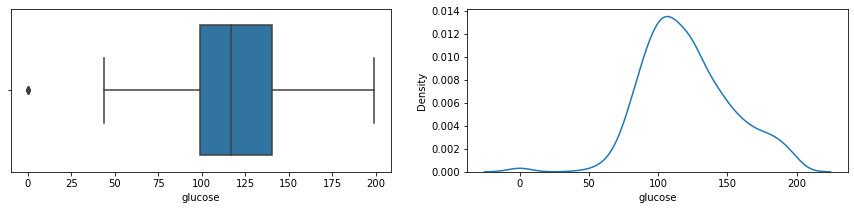

In [19]:
feature_box_kde_normality('glucose')

In [35]:
data_library['Glucose']

'Plasma glucose concentration a 2 hours in an oral glucose tolerance test'

In [37]:
df.glucose.median()

117.0

In [38]:
df['glucose']= df['glucose'].replace({0:117})

The statistic value is 0.9696223139762878 with p-value : 1.5240374934277767e-11
glucose is not normally distributed
Outlier : ([], [])


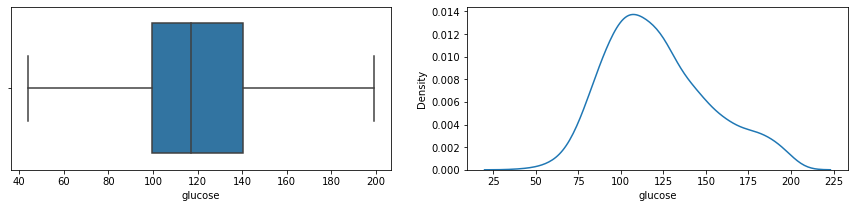

In [39]:
feature_box_kde_normality('glucose')

In [41]:
df.groupby('outcome')[['pregnancies','glucose']].mean().sort_values('outcome')

,pregnancies,glucose
outcome,,
0,3.298000,110.682000
1,4.701493,142.130597


# BLOOD PRESSURE

In [24]:
df['bloodpressure'].value_counts().count()

47

The statistic value is 0.8189212083816528 with p-value : 1.5840069624449098e-28
bloodpressure is not normally distributed
Outlier : [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]


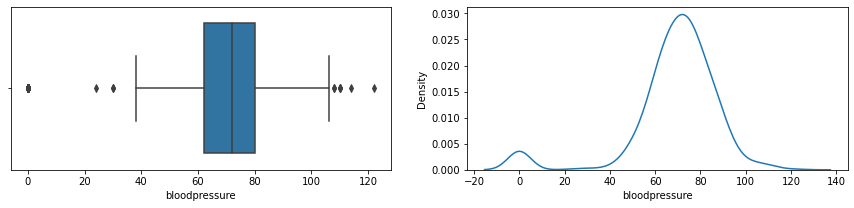

In [28]:
feature_box_kde_normality('bloodpressure')

In [47]:
df.bloodpressure.median()

72.0

In [48]:
df['bloodpressure']= df['bloodpressure'].replace({0:72})

The statistic value is 0.9878154993057251 with p-value : 5.2496684475045186e-06
bloodpressure is not normally distributed
Outlier : ([40, 30, 110, 108, 122, 30, 110, 104, 108, 104, 110, 24, 38, 106, 106, 106, 114], [4, 18, 43, 84, 106, 125, 177, 207, 362, 440, 549, 597, 599, 658, 662, 672, 691])


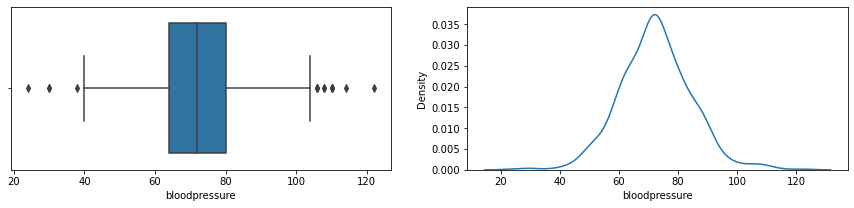

In [49]:
feature_box_kde_normality('bloodpressure')

In [50]:
df.groupby('outcome')[['pregnancies','glucose','bloodpressure']].mean().sort_values('outcome')

,pregnancies,glucose,bloodpressure
outcome,,,
0,3.298000,110.682000,70.920000
1,4.701493,142.130597,75.123134


# skinthickness

In [29]:

df['skinthickness'].value_counts().count()

51

The statistic value is 0.90462726354599 with p-value : 1.75157635361056e-21
skinthickness is not normally distributed
Outlier : [99]


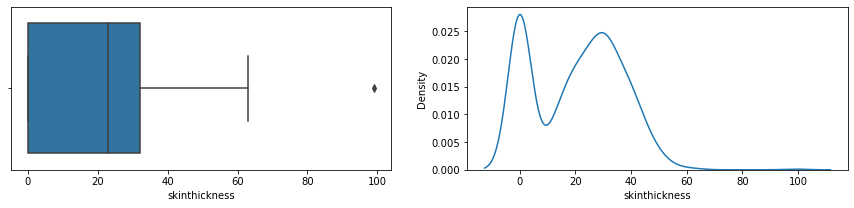

In [30]:
feature_box_kde_normality('skinthickness')